# o1 mini with v2.13 prompt

This notebook outlines the steps undertook to generate a prediction using o1 mini with prompt from 2/13/25.

The prompt is adjusted from the other v2.13 prompts to better suite the reasoning model's style based on the documentation.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from gpt_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import reasoning_instructions_v213
MODEL_ID = "o1-mini-2024-09-12"
SYSTEM_PROMPT = reasoning_instructions_v213

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
len(df)

1084

In [3]:
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 4
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 0
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 2
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 3
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 1
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 5
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 6
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 7
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 O

CPU times: user 51.5 s, sys: 6.61 s, total: 58.1 s
Wall time: 27min


[{'0005.91306_cites_88693.txt': {'model': 'o1-mini-2024-09-12',
   'input_tokens': 813,
   'output_tokens': 965,
   'prediction': 'no',
   'confidence': 0.9,
   'rationale': 'The passage does not indicate that 16 Wall. 402 has been overruled, only discusses and relies on its propositions.',
   'raw_results': '```json\n{\n  "overruled": "no",\n  "confidence": 0.9,\n  "rationale": "The passage does not indicate that 16 Wall. 402 has been overruled, only discusses and relies on its propositions."\n}\n```'}},
 {'0001.91306_cites_88061.txt': {'model': 'o1-mini-2024-09-12',
   'input_tokens': 1589,
   'output_tokens': 1096,
   'prediction': 'yes',
   'confidence': 1.0,
   'rationale': 'The Acting Case states that the original decision in Texas v. White, 7 Wall. 700, must be regarded as overruled.',
   'raw_results': '```json\n{\n  "overruled": "yes",\n  "confidence": 1.0,\n  "rationale": "The Acting Case states that the original decision in Texas v. White, 7 Wall. 700, must be regarded as ov

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0005.91306_cites_88693.txt,o1-mini-2024-09-12,813.0,965.0,no,0.90,The passage does not indicate that 16 Wall. 40...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,0001.91306_cites_88061.txt,o1-mini-2024-09-12,1589.0,1096.0,yes,1.00,The Acting Case states that the original decis...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
2,0003.91306_cites_87633.txt,o1-mini-2024-09-12,834.0,966.0,no,0.95,The Acting Case repeats and reaffirms the rule...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,o1-mini-2024-09-12,810.0,1598.0,no,1.00,"The Acting Case reaffirms the target case, wit...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0002.91306_cites_88994.txt,o1-mini-2024-09-12,1302.0,1604.0,no,0.60,The Acting Case questions the soundness of the...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/6.gpt/7.o1_mini_v213_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

96

In [6]:
prediction_df = pd.read_csv("predictions/6.gpt/7.o1_mini_v213_prompt.csv")

In [7]:
retry = prediction_df[prediction_df["prediction"].isna()]
retry_filenames = retry["filename"].to_list()
retry = df[df["filename"].isin(retry_filenames)]
len(retry)

96

In [8]:
%%time
retry_predictions = predict(retry, MODEL_ID, SYSTEM_PROMPT)
retry_predictions[:2]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 14
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 47
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 8
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 22
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 141
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 185
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 160
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 182
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTT

CPU times: user 5.22 s, sys: 576 ms, total: 5.8 s
Wall time: 2min 9s


[{'0016.92291_cites_88699.txt': {'model': 'o1-mini-2024-09-12',
   'input_tokens': 1239,
   'output_tokens': 838,
   'prediction': 'no',
   'confidence': 0.6,
   'rationale': 'Passage 2 suggests a shift in legal perspective since Osborne v. Mobile but does not explicitly state it has been overruled.',
   'raw_results': '```json\n{\n  "overruled": "no",\n  "confidence": 0.6,\n  "rationale": "Passage 2 suggests a shift in legal perspective since Osborne v. Mobile but does not explicitly state it has been overruled."\n}\n```'}},
 {'0049.99004_cites_95042.txt': {'model': 'o1-mini-2024-09-12',
   'input_tokens': 1376,
   'output_tokens': 839,
   'prediction': 'yes',
   'confidence': 0.95,
   'rationale': 'The Acting Case explicitly states that the views expressed in the Target Case must be regarded as overruled by the decision in the current case.',
   'raw_results': '```json\n{\n  "overruled": "yes",\n  "confidence": 0.95,\n  "rationale": "The Acting Case explicitly states that the views e

In [9]:
retry_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in retry_predictions 
    for filename, details in prediction.items()
])
retry_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0016.92291_cites_88699.txt,o1-mini-2024-09-12,1239,838,no,0.60,Passage 2 suggests a shift in legal perspectiv...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,0049.99004_cites_95042.txt,o1-mini-2024-09-12,1376,839,yes,0.95,The Acting Case explicitly states that the vie...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
2,0009.92059_cites_91368.txt,o1-mini-2024-09-12,2174,1735,no,0.90,The passages reference Poindexter v. Greenhow ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0024.93311_cites_87776.txt,o1-mini-2024-09-12,1769,1467,yes,0.90,The Acting Case states that later adjudication...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.9,..."
4,0143.103172_cites_85272.txt,o1-mini-2024-09-12,1554,1860,no,0.90,The Acting Case cites McCulloch v. Maryland as...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [10]:
retry_df["prediction"].isna().sum()

0

In [11]:
comb_prediction_df = prediction_df.copy()
comb_prediction_df.set_index("filename", inplace=True)
retry_df.set_index("filename", inplace=True)
comb_prediction_df = comb_prediction_df.mask(comb_prediction_df['prediction'].isna(), retry_df)
comb_prediction_df.reset_index(inplace=True)

In [12]:
prediction_df = comb_prediction_df

In [13]:
prediction_df["prediction"].isna().sum()

0

In [14]:
prediction_df.to_csv("predictions/6.gpt/7.o1_mini_v213_prompt.csv", index=False)

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
#prediction_df = pd.read_csv("predictions/6.gpt/7.o1_mini_v213_prompt.csv")

In [15]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [16]:
assert len(df) == len(prediction_df)

In [17]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,o1-mini-2024-09-12,1589.0,1096.0,yes,1.00,The Acting Case states that the original decis...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,o1-mini-2024-09-12,1302.0,1604.0,no,0.60,The Acting Case questions the soundness of the...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,o1-mini-2024-09-12,834.0,966.0,no,0.95,The Acting Case repeats and reaffirms the rule...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,o1-mini-2024-09-12,810.0,1598.0,no,1.00,"The Acting Case reaffirms the target case, wit...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,o1-mini-2024-09-12,813.0,965.0,no,0.90,The passage does not indicate that 16 Wall. 40...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


# Run evaluation

In [18]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [19]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [20]:
eval_df["prediction"].value_counts()

prediction
no     900
yes    184
Name: count, dtype: int64

In [21]:
eval_df["input_tokens"].sum()

2095535.0

In [22]:
eval_df["output_tokens"].sum()

1855244.0

In [23]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [24]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.94      0.90      0.92       935
         Yes       0.51      0.62      0.56       149

    accuracy                           0.86      1084
   macro avg       0.72      0.76      0.74      1084
weighted avg       0.88      0.86      0.87      1084



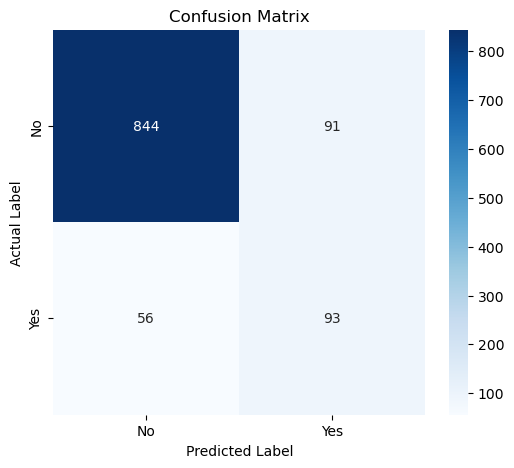

In [25]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [26]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.86
Precision: 0.51
Recall: 0.62
F-score: 0.56
Specificity: 0.90
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 93
True negatives: 844
False positives: 91
False negatives: 56


In [27]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

89

In [28]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

49

# Save the evaluation df

In [29]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,o1-mini-2024-09-12,1589.0,1096.0,yes,1.00,The Acting Case states that the original decis...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,o1-mini-2024-09-12,1302.0,1604.0,no,0.60,The Acting Case questions the soundness of the...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,o1-mini-2024-09-12,834.0,966.0,no,0.95,The Acting Case repeats and reaffirms the rule...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,o1-mini-2024-09-12,810.0,1598.0,no,1.00,"The Acting Case reaffirms the target case, wit...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,o1-mini-2024-09-12,813.0,965.0,no,0.90,The passage does not indicate that 16 Wall. 40...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [30]:
eval_df.to_csv("predictions/6.gpt/7.o1_mini_v213_prompt_eval.csv", index=False)